# Data Loading
Untuk dataset dapat diunduh [di sini](https://www.kaggle.com/sid321axn/gold-price-prediction-dataset)
<br>Pada cell pertama kita akan import semua library yang akan diperlukan.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os
import zipfile
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
url = 'https://query1.finance.yahoo.com/v7/finance/download/GOLD.AX?period1=1546300800&period2=1641772800&interval=1d&events=history&includeAdjustedClose=true'
df = pd.read_csv(url)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,170.199997,172.550003,170.199997,172.350006,172.350006,25901
1,2019-01-03,175.000000,176.500000,174.000000,174.820007,174.820007,20264
2,2019-01-04,174.220001,174.880005,173.500000,173.779999,173.779999,6315
3,2019-01-07,173.500000,173.500000,169.759995,170.300003,170.300003,12188
4,2019-01-08,171.000000,171.000000,169.580002,169.580002,169.580002,3743
...,...,...,...,...,...,...,...
762,2022-01-04,233.479996,233.770004,232.830002,232.929993,232.929993,15333
763,2022-01-05,233.250000,234.000000,233.190002,233.899994,233.899994,8613
764,2022-01-06,233.669998,234.550003,233.350006,234.550003,234.550003,18046
765,2022-01-07,233.000000,233.300003,232.399994,233.289993,233.289993,8181


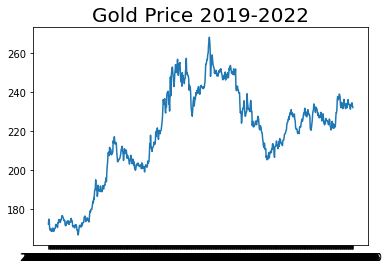

In [ ]:
date = df['Date'].values
close  = df['Adj Close'].values

plt.plot(date, close)
plt.title('Gold Price 2019-2022', fontsize=20);

In [ ]:
print(df['Adj Close'][0])
print(df['Adj Close'][200])
print(df['Adj Close'][400])
print(df['Adj Close'][689])  # df - 10%
print(df['Adj Close'][650])  # df - 15%
print(df['Adj Close'][612])  # df - 20%
print(df['Adj Close'][700])
print(df['Adj Close'][766])

172.350006
207.100006
256.700012
225.600006
227.32000699999998
228.830002
225.75
232.100006


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,218.089022,218.948735,217.291317,218.043155,218.043155,28061.881356
std,24.835275,24.982152,24.660824,24.794234,24.794234,27394.404707
min,167.300003,167.429993,166.699997,166.729996,166.729996,1592.000000
25%,204.290001,205.064995,203.590004,204.279999,204.279999,14108.500000
50%,222.770004,223.470001,221.970001,222.770004,222.770004,20754.000000
75%,235.330002,236.245002,233.779999,234.805000,234.805000,32848.500000
max,267.940002,271.000000,266.279999,268.149994,268.149994,352181.000000


In [ ]:
close_median = df['Adj Close'].median()
vol_median = df['Volume'].median()
open_median = df['Open'].median()
high_median = df['High'].median()
low_median = df['Low'].median()

print(close_median)
print(vol_median)
print(open_median)
print(high_median)
print(low_median)

222.770004
20754.0
222.770004
223.47000099999997
221.97000099999997


# Mendeteksi Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       767 non-null    object 
 1   Open       767 non-null    float64
 2   High       767 non-null    float64
 3   Low        767 non-null    float64
 4   Close      767 non-null    float64
 5   Adj Close  767 non-null    float64
 6   Volume     767 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 42.1+ KB


Jika kita lihat pada output diatas dataset kita tidak memiliki niai Null atau tidak ada missing value. Maka kita akan lanjut mendeteksi outliers dan menggantinya.

# Menangani Outliers
Untuk mendeteksi outliers kita bisa menggunakan beberapa teknik, antara lain:
* Hypothesis Testing
* Z-score method
* IQR Method

Sebelumnya, untuk mengetahui outliers kita bisa melakukan teknik visualisasi Boxplot. Maka dari itu kita akan melakukan visualisasi terlebih dahulu.

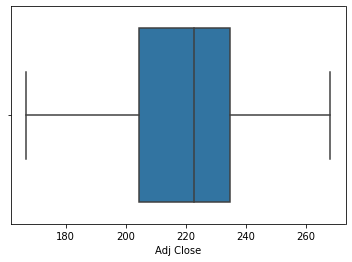

In [ ]:
sns.boxplot(x=df['Adj Close'])

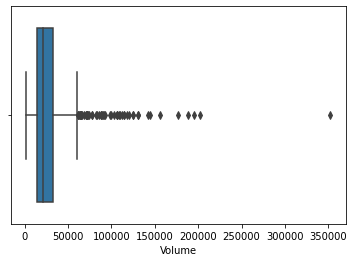

In [ ]:
sns.boxplot(x=df['Volume'])

Dari visualasi boxplot diatas kita bisa lihat bahwa dataset kita memiliki outliers, terutama pada column yang kita akan pakai yaitu column 'Adj Close', dan 'Volume'. Kita bisa saja menghapusnya tetapi karena ini merupakan dataset harian maka akan menghasilkan data yang hilang. Oleh karena itu kita akan menggantinya dengan nilai Median.

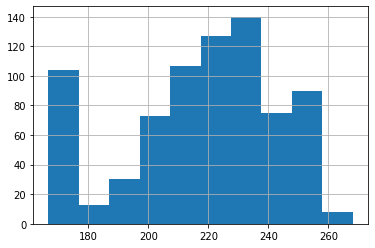

In [ ]:
df['Adj Close'].hist()

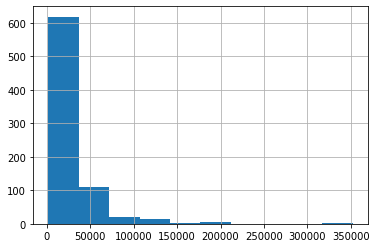

In [ ]:
df['Volume'].hist()

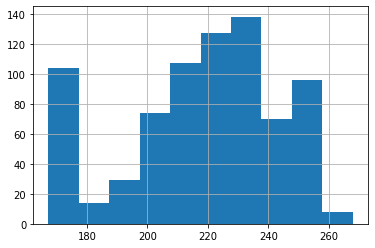

In [ ]:
df['Open'].hist()

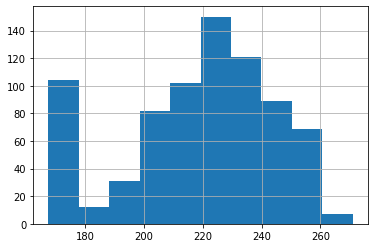

In [ ]:
df['High'].hist()

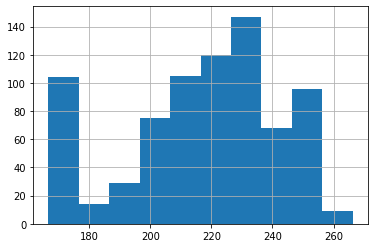

In [ ]:
df['Low'].hist()

Jika kita lihat pada [03] pada bagian histogram ia menyatakan jika data pada histogram terdistribusi ke arah kiri itu menunjukan adanya outliers pada data. Pada histogram volume kita, kita bisa lihat bahwa data terdistribusi ke arah kiri yang mengindikasikan adanya outliers pada data.

Dikutip dari [03] tahap untuk memastikan adanya outliers adalah dengan cara melihat skewness value. Skewness dari rentan -1 sampai 1 terbilang normal distribution, dan nilai yang perubahannya sangat besar mengindikasikan adanya outliers.

In [ ]:
print('skewness value of Adj Close: ',df['Adj Close'].skew())
print('skewness value of Volume: ',df['Volume'].skew())
print('skewness value of Open: ',df['Open'].skew())
print('skewness value of High: ',df['High'].skew())
print('skewness value of Low: ',df['Low'].skew())

skewness value of Adj Close:  -0.4961562768585715
skewness value of Volume:  4.457710908666603
skewness value of Open:  -0.49109950423367865
skewness value of High:  -0.4754118412774641
skewness value of Low:  -0.500601583042607


Dari output diatas kita bisa lihat bahwa data pada column Volume memiliki outliers, karena memiliki nilai 4.8 yang berarti rightly skewed yang mengindikasikan adanya outliers.

Selanjutnya kita akan menggantikan outliers dengan nilai Median pada data.Dikutip dari [03] tidak di rekomendasikan untuk menggantikannya dengan nilai Mean karena sangat rentan terhadap outlier. Ada beberapa teknik untuk menangani outliers, antara lain:
* Hypothesis Testing
* Z-score method
* IQR Method

Disini saya memilih untuk menggunakan IQR. Alasannya adalah saya lebih sering menggunakan metode IQR dan juga dari metode yang digunakan [03] adalah metode IQR. Dua cell dibawah akan mengeluarkan output outliers.

In [ ]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5

vol_outliers = df[(df['Volume'] < Q1 - whisker_width*IQR) | (df['Volume'] > Q3 + whisker_width*IQR)]
vol_values=pd.DataFrame(vol_outliers['Volume'])
vol_values = vol_values.values
vol_median = df['Volume'].median()

df['Volume'] = df['Volume'].replace(to_replace=vol_values, value=vol_median)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,170.199997,172.550003,170.199997,172.350006,172.350006,25901
1,2019-01-03,175.000000,176.500000,174.000000,174.820007,174.820007,20264
2,2019-01-04,174.220001,174.880005,173.500000,173.779999,173.779999,6315
3,2019-01-07,173.500000,173.500000,169.759995,170.300003,170.300003,12188
4,2019-01-08,171.000000,171.000000,169.580002,169.580002,169.580002,3743
...,...,...,...,...,...,...,...
762,2022-01-04,233.479996,233.770004,232.830002,232.929993,232.929993,15333
763,2022-01-05,233.250000,234.000000,233.190002,233.899994,233.899994,8613
764,2022-01-06,233.669998,234.550003,233.350006,234.550003,234.550003,18046
765,2022-01-07,233.000000,233.300003,232.399994,233.289993,233.289993,8181


Setelah kita menangani outliers kita dapat melanjutkan ke tahap Data Analysis menggunakan Multivariate Analysis.

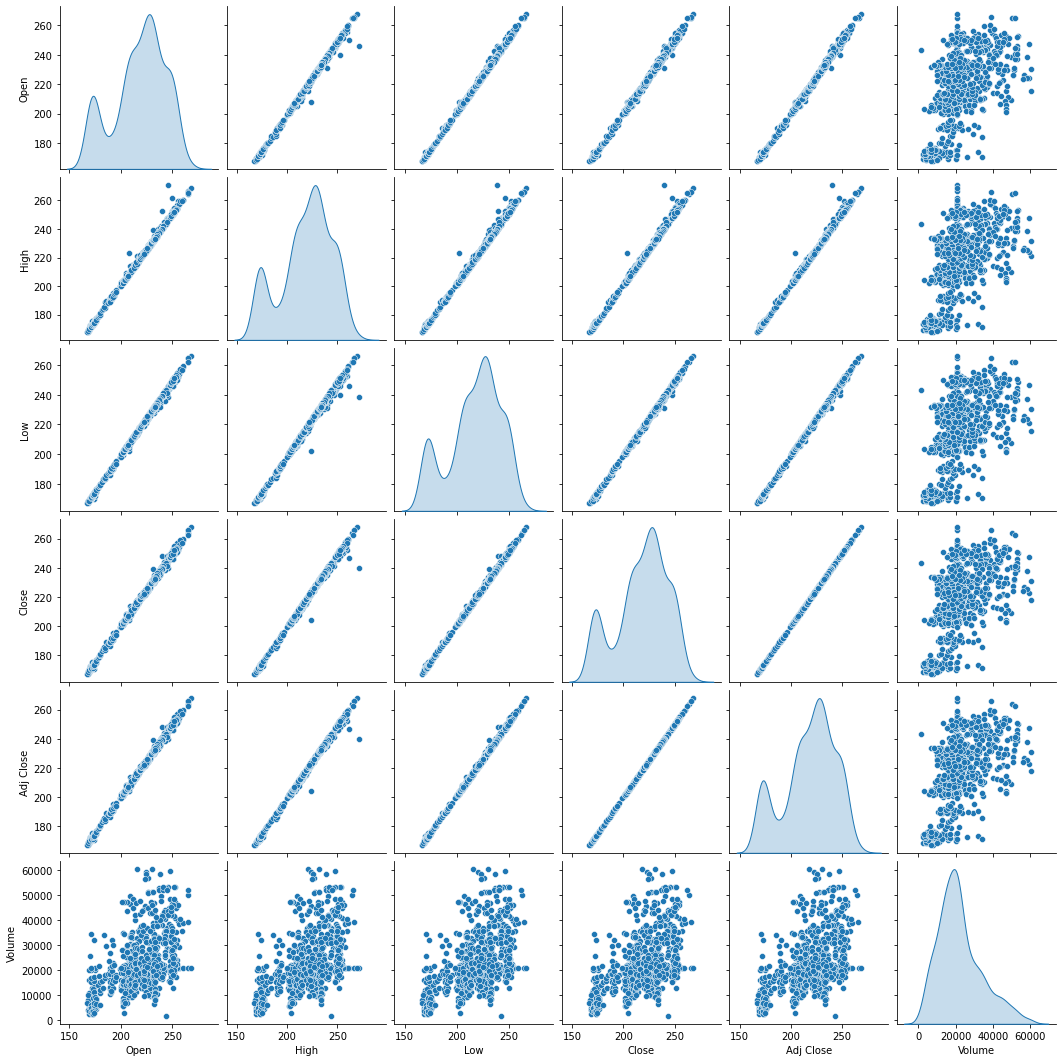

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Dari grafik diatas kita bisa lihat bahwa column 'Open', 'High', dan 'Low' memiliki korelasi yang tinggi dengan output variabel kita yaitu 'Adj Close'.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

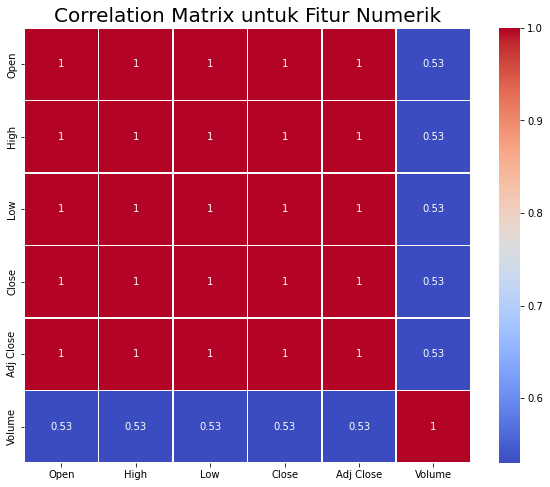

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title('Correlation Matrix untuk Fitur Numerik', size=20)

Jika kita perhatikan column 'Open', 'High', dan 'Low' memiliki korelasi yang tinggi (diatas 0.9). Maka kita bisa drop column 'Volume', dan 'Close'. Alasannya adalah column Volume memiliki korelasi yang rendah sekali, dan column close tidak berguna karena outcome variabel kita adalah Adj Close . Perbedaan keduanya ada pada bagian deklarasi variabel.

Selanjutnya kita bisa lanjut ke tahap Data Preparation atau Pre-processing.

# Data Preparation
Karena dataset ini tidak memiliki fitur kategori maka kita tidak perlu melakukan encoding. Pada tahapan ini saya tidak melakukan reduksi dimensi dengan PCA dikarenakan saya ingin menjadi Open saja yang sebagai data input untuk memprediksi harga emas. Alasanya adalah karena jika kita ingin memprediksi harga emas kita belum tahu nilai 'High' dan 'Low'nya.

Sebelum masuk ke tahap Data Preparation kita harus melakukan train_test_split agar tidak terjadi kebocoran data. Pada cell pertama saya akan melakukan split. Jumlah test_size yang saya gunakan adalah 15% alasan saya menggunakan 15% adalah jika kita menggunakan 20% data test akan ada sebanyak 154 yang berarti terlalu banyak untuk dataset yang kecil seperti ini. Paramter shuffle saya jadikan False agar data tetap dalam urutan waktu yang merupakan hal sangat penting.

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,170.199997,172.550003,170.199997,172.350006,172.350006,25901
1,2019-01-03,175.000000,176.500000,174.000000,174.820007,174.820007,20264
2,2019-01-04,174.220001,174.880005,173.500000,173.779999,173.779999,6315
3,2019-01-07,173.500000,173.500000,169.759995,170.300003,170.300003,12188
4,2019-01-08,171.000000,171.000000,169.580002,169.580002,169.580002,3743
...,...,...,...,...,...,...,...
762,2022-01-04,233.479996,233.770004,232.830002,232.929993,232.929993,15333
763,2022-01-05,233.250000,234.000000,233.190002,233.899994,233.899994,8613
764,2022-01-06,233.669998,234.550003,233.350006,234.550003,234.550003,18046
765,2022-01-07,233.000000,233.300003,232.399994,233.289993,233.289993,8181


In [ ]:
x=pd.DataFrame(df[['Open']])
y=pd.DataFrame(df['Adj Close'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)

In [ ]:
x_train

,Open
0,170.199997
1,175.000000
2,174.220001
3,173.500000
4,171.000000
...,...
646,230.210007
647,228.889999
648,228.429993
649,228.139999


In [ ]:
y_train

,Adj Close
0,172.350006
1,174.820007
2,173.779999
3,170.300003
4,169.580002
...,...
646,231.690002
647,227.899994
648,228.600006
649,229.740005


Setelah melakukan split kita bisa lanjut ke tahap sandarisasi atau normalisasi agar skala data relatif sama. Disini saya menggunakan StandardScaler.

In [ ]:
numerical_features = ['Open']
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
x_train[numerical_features].head()

,Open
0,-1.740597
1,-1.558760
2,-1.588308
3,-1.615584
4,-1.710290


In [ ]:
x_train

,Open
0,-1.740597
1,-1.558760
2,-1.588308
3,-1.615584
4,-1.710290
...,...
646,0.532741
647,0.482736
648,0.465310
649,0.454324


In [ ]:
y_train

,Adj Close
0,172.350006
1,174.820007
2,173.779999
3,170.300003
4,169.580002
...,...
646,231.690002
647,227.899994
648,228.600006
649,229.740005


In [ ]:
x_test

,Open
651,227.830002
652,228.990005
653,230.729996
654,230.419998
655,229.559998
...,...
762,233.479996
763,233.250000
764,233.669998
765,233.000000


In [ ]:
y_test

,Adj Close
651,229.000000
652,229.550003
653,230.990005
654,229.960007
655,228.470001
...,...
762,232.929993
763,233.899994
764,234.550003
765,233.289993


# Model Development
Seperti yang telah sebutkan, saya akan menggunakan algoritma K-Nearest Neighbor, Random Forest, Boosting Algorithm, dan Neural Network. Pada cell pertama saya akan membuat DataFrame untuk tahap evaluation nanti. Pada cell kedua dan seterusnya saya akan memulai tahap model development. Berdasarkan [04], algoritma KNN secara default menggunakan metrik Euclidean, tetapi terdapat juga metrik yang lain yaitu Minkowski. Untuk menemukan parameter hyperparameter tuning yang tepat saya akan menggunakan teknik GridSearch dari Library Scikit Learn.

In [ ]:
# dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'KNNTune1', 'RandomForest', 'RandomForestTune1', 'Boosting', 'BoostingTune1', 'NN', 'NNTune1'])
models

,KNN,KNNTune1,RandomForest,RandomForestTune1,Boosting,BoostingTune1,NN,NNTune1
train_mse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_mse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## K-Nearest Neighbor Models

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10, metric='euclidean')
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_train)

In [ ]:
knn_hypt = KNeighborsRegressor()

knn_params = [{'n_neighbors': (range(10, 50)), 'algorithm': ('ball_tree', 'kd_tree', 'brute'), 'metric': ('minkowski', 'euclidean')}]
knngs = GridSearchCV(knn_hypt, knn_params, cv = 15, scoring='neg_mean_squared_error')

knngs.fit(x_train, y_train)

GridSearchCV(cv=15, estimator=KNeighborsRegressor(),
             param_grid=[{'algorithm': ('ball_tree', 'kd_tree', 'brute'),
                          'metric': ('minkowski', 'euclidean'),
                          'n_neighbors': range(10, 50)}],
             scoring='neg_mean_squared_error')

In [ ]:
print(knngs.best_params_)
print(knngs.best_score_)

{'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 10}
-3.324592270013559


Dari diatas kita bisa lihat bahwa paramter-parameter yang paling tepat adalah menggunakan algoritma Brute, metric Minkowski, dan n_neighbors 10.

In [ ]:
knn_hypt = KNeighborsRegressor(algorithm='brute', metric='minkowski', n_neighbors=10)

knn_hypt.fit(x_train, y_train)
y_pred_knn_hypt = knn_hypt.predict(x_train)

## Random Forest Models

In [ ]:
RF = RandomForestRegressor(n_estimators=80, max_depth=20, random_state=None, n_jobs=-1)
RF.fit(x_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
RF_hypt = RandomForestRegressor()

rf_params = [{'n_estimators': (range(100, 135)), 'max_depth': (None, range(1, 30))}]
rfgs = GridSearchCV(RF_hypt, rf_params, cv = 5, scoring='neg_mean_squared_error')

rfgs.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': (None, range(1, 30)),
                          'n_estimators': range(100, 135)}],
             scoring='neg_mean_squared_error')

In [ ]:
print(rfgs.best_params_)
print(rfgs.best_score_)

{'max_depth': None, 'n_estimators': 100}
-49.132778404109054


In [ ]:
RF_hypt = RandomForestRegressor(max_depth=None, n_estimators=134)

RF_hypt.fit(x_train, y_train)
models.loc['train_mse','RandomForestTune1'] = mean_squared_error(y_pred=RF_hypt.predict(x_train), y_true=y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


## Boosting Algorithm

In [ ]:
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05)                             
boosting.fit(x_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train), y_true=y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
boosting_hypt = AdaBoostRegressor()

boost_params = [{'learning_rate': (0.5, 0.05), 'n_estimators': (range(60, 90))}]
btgs = GridSearchCV(boosting_hypt, boost_params, cv = 15, scoring='neg_mean_squared_error')

btgs.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=15, estimator=AdaBoostRegressor(),
             param_grid=[{'learning_rate': (0.5, 0.05),
                          'n_estimators': range(60, 90)}],
             scoring='neg_mean_squared_error')

In [ ]:
print(btgs.best_params_)
print(btgs.best_score_)

{'learning_rate': 0.5, 'n_estimators': 76}
-6.364109109473558


In [ ]:
boosting_hypt = AdaBoostRegressor(learning_rate=0.5, n_estimators=88)

boosting_hypt.fit(x_train, y_train)
models.loc['train_mse','BoostingTune1'] = mean_squared_error(y_pred=boosting_hypt.predict(x_train), y_true=y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Neural Network

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), 
              optimizer=optimizer, 
              metrics=['mse'])

history = model.fit(
    x_train.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
9/9 [==============================] - 1s 54ms/step - loss: 214.7132 - mse: 47171.4961 - val_loss: 218.6010 - val_mse: 48058.1562
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 214.6971 - mse: 47164.8750 - val_loss: 218.5843 - val_mse: 48050.8398
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 214.6712 - mse: 47153.7422 - val_loss: 218.5645 - val_mse: 48042.1602
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 214.6465 - mse: 47143.0938 - val_loss: 218.5434 - val_mse: 48032.9492
Epoch 5/10
9/9 [==============================] - 0s 7ms/step - loss: 214.6199 - mse: 47131.6680 - val_loss: 218.5219 - val_mse: 48023.5039
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 214.5894 - mse: 47118.7773 - val_loss: 218.4999 - val_mse: 48013.8711
Epoch 7/10
9/9 [==============================] - 0s 7ms/step - loss: 214.5647 - mse: 47108.2461 - val_loss: 218.4778 - val_mse: 48004.1758
Epoch 8/10
9/9 [===

In [ ]:
model_hypt = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

optimizer_hypt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model_hypt.compile(loss=tf.keras.losses.Huber(), 
              optimizer=optimizer_hypt, 
              metrics=['mse'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history_hypt = model_hypt.fit(
    x_train.values, 
    y_train.values, 
    epochs=30, 
    batch_size=64,
    validation_split=0.2)

Epoch 1/30
9/9 [==============================] - 1s 26ms/step - loss: 214.5382 - mse: 47093.7031 - val_loss: 217.7876 - val_mse: 47701.7969
Epoch 2/30
9/9 [==============================] - 0s 7ms/step - loss: 212.3145 - mse: 46149.2891 - val_loss: 213.4229 - val_mse: 45813.8242
Epoch 3/30
9/9 [==============================] - 0s 9ms/step - loss: 180.4600 - mse: 34973.3867 - val_loss: 131.6964 - val_mse: 17499.8047
Epoch 4/30
9/9 [==============================] - 0s 7ms/step - loss: 141.4902 - mse: 24324.8027 - val_loss: 53.4802 - val_mse: 2929.7107
Epoch 5/30
9/9 [==============================] - 0s 7ms/step - loss: 86.9531 - mse: 10801.2471 - val_loss: 4.8510 - val_mse: 47.5490
Epoch 6/30
9/9 [==============================] - 0s 7ms/step - loss: 30.2398 - mse: 1456.2057 - val_loss: 27.9910 - val_mse: 817.7965
Epoch 7/30
9/9 [==============================] - 0s 7ms/step - loss: 39.4047 - mse: 2128.4089 - val_loss: 57.4333 - val_mse: 3378.8340
Epoch 8/30
9/9 [====================

# Evaluation
Metrik yang akan digunakan pada tahap evaluasi ada MSE. Rumus:


In [ ]:
# Tabel yang akan digunakan
models

,KNN,KNNTune1,RandomForest,RandomForestTune1,Boosting,BoostingTune1,NN,NNTune1
train_mse,NaN,NaN,0.33522,0.333793,7.13635,2.86978,NaN,NaN
test_mse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x_test.loc[:, numerical_features] = scaler.transform(x_test[numerical_features])
x_test

,Open
651,0.442581
652,0.486525
653,0.552440
654,0.540697
655,0.508117
...,...
762,0.656617
763,0.647904
764,0.663815
765,0.638434


In [ ]:
x_test.describe()

,Open
count,116.000000
mean,0.486426
std,0.180141
min,0.103531
25%,0.344559
50%,0.492775
75%,0.626406
max,0.882777


In [ ]:
x_train

,Open
0,-1.740597
1,-1.558760
2,-1.588308
3,-1.615584
4,-1.710290
...,...
646,0.532741
647,0.482736
648,0.465310
649,0.454324


In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','KNNTune1','RF','RFTune1','Boosting','BoostingTune1','NN','NNTune1'])
model_dict = {'KNN':knn, 'KNNTune1':knn_hypt, 'RF':RF, 'RFTune1':RF_hypt, 'Boosting':boosting, 'BoostingTune1':boosting_hypt, 'NN':model, 'NNTune1':model_hypt}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3
 
mse

,train,test
KNN,0.00143263,0.00081681
KNNTune1,0.0014316,0.00081681
RF,0.00033522,0.00144049
RFTune1,0.000333793,0.0013938
Boosting,0.00713635,0.00699958
BoostingTune1,0.00286978,0.00217907
NN,0.185164,0.0166221
NNTune1,0.185164,0.0166221


In [ ]:
mse.drop(['NN', 'NNTune1'], axis=0, inplace=True)
mse

,train,test
KNN,0.00143263,0.00081681
KNNTune1,0.0014316,0.00081681
RF,0.00033522,0.00144049
RFTune1,0.000333793,0.0013938
Boosting,0.00713635,0.00699958
BoostingTune1,0.00286978,0.00217907


Kedua Model Neural Network adalah model yang paling berperforma buruk oleh karena itu kita bisa drop row 'NN' dan 'NNTune1' agar bisa lihat performa model yang lain.

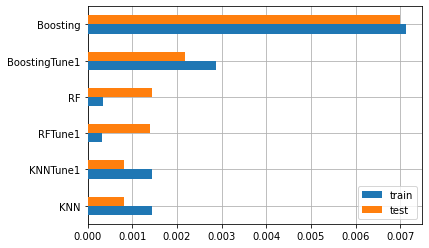

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=True).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dengan alasan yang sama saya akan drop row dan Boosting.

In [ ]:
mse.drop(['Boosting'], axis=0, inplace=True)
mse

,train,test
KNN,0.00143263,0.00081681
KNNTune1,0.0014316,0.00081681
RF,0.00033522,0.00144049
RFTune1,0.000333793,0.0013938
BoostingTune1,0.00286978,0.00217907


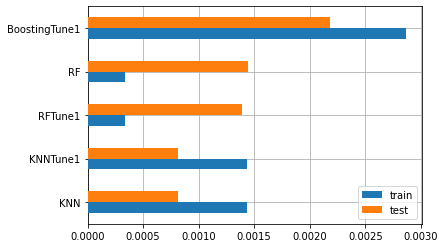

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=True).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari grafik diatas kita bisa simpulkan bahwa model dengan algoritma KNN dan KNN yang sudah di tune adalah model yang memiliki kinerja yang paling bagus. Dalam bidang Training model KNN adalah model yang bagus, tetapi dalam bidang Testing model KNN yang sudah di tune (KNNTune1) lebih unggul. Oleh karena itu kita akan mengambil model KNNTune1 karena lebih unggul dalam bidang testing.

In [ ]:
prediksi = x_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pred_dict

{'prediksi_Boosting': array([231.4]),
 'prediksi_BoostingTune1': array([229.2]),
 'prediksi_KNN': array([[227.8]]),
 'prediksi_KNNTune1': array([[227.8]]),
 'prediksi_NN': array([[0.2]], dtype=float32),
 'prediksi_NNTune1': array([[227.1]], dtype=float32),
 'prediksi_RF': array([227.4]),
 'prediksi_RFTune1': array([227.4]),
 'y_true':      Adj Close
 651      229.0}

In [ ]:
# Rata-rata kenaikan 
raw = y.pct_change(periods=766, fill_method ='ffill').mean()
percentage_raw = raw*100  # output yang dikeluarkan belum berupa persentase
percentage = str(percentage_raw).split()

print('Rata-rata kenaikan harga emas dari periode January 2019-2022 adalah {0}%'.format(percentage[2]))

Rata-rata kenaikan harga emas dari periode January 2019-2022 adalah 34.667826%


untuk memastikan kita bisa cek sekali lagi dengan cara manual

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,170.199997,172.550003,170.199997,172.350006,172.350006,25901
1,2019-01-03,175.000000,176.500000,174.000000,174.820007,174.820007,20264
2,2019-01-04,174.220001,174.880005,173.500000,173.779999,173.779999,6315
3,2019-01-07,173.500000,173.500000,169.759995,170.300003,170.300003,12188
4,2019-01-08,171.000000,171.000000,169.580002,169.580002,169.580002,3743
...,...,...,...,...,...,...,...
762,2022-01-04,233.479996,233.770004,232.830002,232.929993,232.929993,15333
763,2022-01-05,233.250000,234.000000,233.190002,233.899994,233.899994,8613
764,2022-01-06,233.669998,234.550003,233.350006,234.550003,234.550003,18046
765,2022-01-07,233.000000,233.300003,232.399994,233.289993,233.289993,8181


In [ ]:
nilai_awal = df['Adj Close'][0]
nilai_kenaikan = nilai_awal * (percentage_raw / 100)
nilai_akhir = nilai_awal + nilai_kenaikan

print('nilai harga emas pada akhir dataset (row 766): {}'.format(nilai_akhir))

nilai harga emas pada akhir dataset (row 766): Adj Close    232.100006
dtype: float64


In [ ]:
nilai_kenaikan

Adj Close    59.75
dtype: float64

In [ ]:
# rata-rata persentase kenaikan perhari
raw_h = y.pct_change(periods=1, fill_method ='ffill').mean()
raw_percentage_h = raw_h*100  # output yang dikeluarkan belum berupa persentase
percentage_h = str(raw_percentage_h).split()

print('Rata-rata kenaikan harga emas per hari adalah {0}%'.format(percentage_h[2]))

Rata-rata kenaikan harga emas per hari adalah 0.043504%
